In [49]:
'''
This file plots CMIP5 RCP - HIST over South Australia
/Users/earl/Desktop/Yang
and places the outputs in
/Users/earl/Dropbox/CMIP5/figures

Earl Duran 
created: 19-Mar-18
e.duran@unsw.edu.au
'''

import os
import xarray as xr
import numpy as np
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import matplotlib
import sys
import pickle
import itertools
def find_nearest_index(array, value):
    return int((np.abs(array - value)).argmin())
from scipy import interpolate
def listdir_nohidden(path):
    f_list = [f for f in os.listdir(path) if not f.startswith('.')]
    return f_list


In [44]:
%%javascript
IPython.notebook.kernel.execute('nb_name = ' + '"' + IPython.notebook.notebook_name + '"')

<IPython.core.display.Javascript object>

In [45]:
figures_path = '/Users/earl/Dropbox/CMIP5/figures/'
script_name = nb_name[:-6]
print('Figures will be saved in: ' + figures_path + script_name + '\n')

remote_domain = 'erd561@raijin.nci.org.au:'
remote_path = '/g/data/e14/erd561/CMIP5/Matt/'
local_path = '/Users/earl/Desktop/alamanda/'
os.system('sshfs ' +
          remote_domain +
          remote_path + ' ' +
          local_path)

Figures will be saved in: /Users/earl/Dropbox/CMIP5/figures/p23_plot_spaghetti_u10



0

In [70]:
model_list = sorted(listdir_nohidden(local_path + 'hist_1980-1999/u10/'))

uas_lat_list = {}

uas_8099_list = {}
uas_8099_zonavg_list = {}
uas_5069_list = {}
uas_5069_zonavg_list = {}

for model in model_list:
    uas_lat_list[model] = xr.open_dataset(
        local_path + 'hist_1980-1999/u10/' + model, decode_times=False)['lat'][:]
    
    uas_8099_list[model] = xr.open_dataset(
        local_path + 'hist_1980-1999/u10/' + model, decode_times=False)['uas'][0,:,:]
    uas_8099_zonavg_list[model] = np.nanmean(uas_8099_list[model], axis = 1)
    
    uas_5069_list[model] = xr.open_dataset(
        local_path + 'hist_1950-1969/u10/' + model, decode_times=False)['uas'][0,:,:]
    uas_5069_zonavg_list[model] = np.nanmean(uas_5069_list[model], axis = 1)
    
    print(model + ' OK!')
    
#print(uas_list)

ACCESS1-0.nc OK!
ACCESS1-3.nc OK!
CMCC-CM.nc OK!
CMCC-CMS.nc OK!
CNRM-CM5.nc OK!
CSIRO-Mk3-6-0.nc OK!
CanESM2.nc OK!
FGOALS-s2.nc OK!
GFDL-CM3.nc OK!
GFDL-ESM2G.nc OK!
GFDL-ESM2M.nc OK!
HadGEM2-AO.nc OK!
IPSL-CM5A-LR.nc OK!
IPSL-CM5A-MR.nc OK!
IPSL-CM5B-LR.nc OK!
MIROC-ESM-CHEM.nc OK!
MIROC-ESM.nc OK!
MPI-ESM-MR.nc OK!
MRI-CGCM3.nc OK!
MRI-ESM1.nc OK!
NorESM1-M.nc OK!


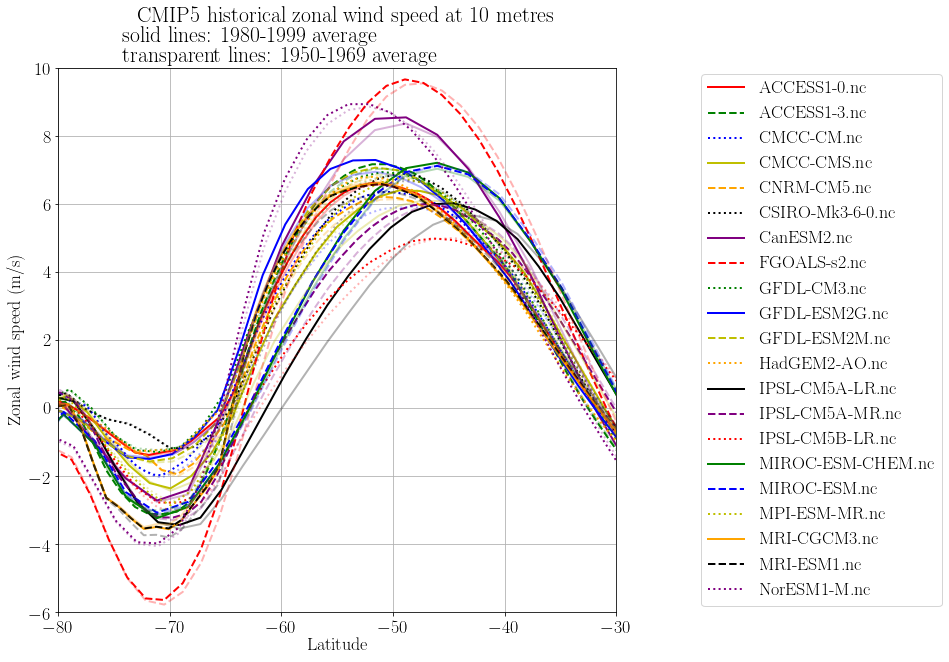

In [92]:
matplotlib.rcParams.update({'font.size': 18}) 
row = 3
col = 4
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

plt.close('all')
fig = plt.figure() 
fig.set_size_inches(10, 10)

# plt.suptitle('Zonal wind speed forcing.\n'
#             + 'Annual average of 1 year simulation in gfdl nyf 1080. Initial condition: 500 years spin up.\n'
#             + 'ctrl: original nyf forcing. ' 
#             + 'hist: u10 and v10 from 1980 to 1999 average in historical CMIP5. '
#             + 'rcp85: u10 and v10 from 2080 to 2099 average in rcp85 CMIP5.\n'
#             + 'CMIP5 selected for +ve SAM in rcp85.')

cmap = plt.get_cmap('seismic')
step = 1
contf_lvls = np.arange(-10,10+1e-08,step)

style = itertools.cycle(('-', '--', ':')) 
color = itertools.cycle(('r', 'g', 'b', 'y', 'orange', 'k', 'purple')) 
for model in model_list:
    plt.plot(uas_lat_list[model], uas_8099_zonavg_list[model], 
             linestyle=next(style), linewidth=2, alpha=1, color=next(color))

plt.legend(model_list, loc='center right', bbox_to_anchor=(1.6, 0.5))

style = itertools.cycle(('-', '--', ':')) 
color = itertools.cycle(('r', 'g', 'b', 'y', 'orange', 'k', 'purple')) 
for model in model_list:
    plt.plot(uas_lat_list[model], uas_5069_zonavg_list[model], 
             linestyle=next(style), linewidth=2, alpha=0.3, color=next(color))

plt.grid()
plt.xlim(-80, -30)
plt.ylim(-6, 10)
plt.title('CMIP5 historical zonal wind speed at 10 metres \\\\'
          + 'solid lines: 1980-1999 average \\\\'
          + 'transparent lines: 1950-1969 average')
plt.xlabel('Latitude')
plt.ylabel('Zonal wind speed (m/s)')


# fig.tight_layout(rect=[0, 0, 1, 0.90])

output_ls = os.listdir(figures_path)
if not script_name:
    script_name = 'test'
elif script_name not in output_ls:
    os.mkdir(figures_path + '/' + script_name)
plt.savefig(figures_path + '/' + script_name + '/' + script_name[0:3] \
            + '_fig1_' + '.png', bbox_inches='tight', dpi=200)